In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/roryobrien/Documents/Coding/Python1/spotify/top10s.csv', encoding='latin-1')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  603 non-null    int64 
 1   title       603 non-null    object
 2   artist      603 non-null    object
 3   top genre   603 non-null    object
 4   year        603 non-null    int64 
 5   bpm         603 non-null    int64 
 6   nrgy        603 non-null    int64 
 7   dnce        603 non-null    int64 
 8   dB          603 non-null    int64 
 9   live        603 non-null    int64 
 10  val         603 non-null    int64 
 11  dur         603 non-null    int64 
 12  acous       603 non-null    int64 
 13  spch        603 non-null    int64 
 14  pop         603 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 70.8+ KB


In [4]:
df.head()

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [5]:
df = df[['year', 'title', 'artist', 'dur']]

In [6]:
df.head()

,year,title,artist,dur
0,2010,"Hey, Soul Sister",Train,217
1,2010,Love The Way You Lie,Eminem,263
2,2010,TiK ToK,Kesha,200
3,2010,Bad Romance,Lady Gaga,295
4,2010,Just the Way You Are,Bruno Mars,221


The dataframe now contains information of year and duration in seconds of each hit song, which is the information we need

In [7]:
df['year'].value_counts()[df['year'].unique()]

2010    51
2011    53
2012    35
2013    71
2014    58
2015    95
2016    80
2017    65
2018    64
2019    31
Name: year, dtype: int64

This shows the amount of hit songs included in each year in the dataset

In [8]:
df['dur'].mean()

224.67495854063017

This is the mean duration of all songs in the dataset from 2010-2019. This is equal to ~ 3 minutes 44 seconds

In [9]:
df.groupby(['year']).mean()

,dur
year,
2010,229.803922
2011,242.566038
2012,224.400000
2013,234.492958
2014,224.155172
2015,223.368421
2016,220.225000
2017,222.169231
2018,217.187500


Mean duration of songs in each year. It can be seen that there has been a steady decrease in average song duration from 2013. The most significant decrease is between 2018 and 2019 which happens to coincide with Tiktok becoming really popular.

In [10]:
df.nsmallest(10, 'dur')

,year,title,artist,dur
330,2015,Mark My Words,Justin Bieber,134
591,2019,All Around The World (La La La),R3HAB,148
174,2013,I Love It (feat. Charli XCX),Icona Pop,157
492,2017,Reality (feat. Janieck Devy) - Radio Edit,Lost Frequencies,158
334,2015,Reality - Radio Edit,Lost Frequencies,159
581,2019,Good as Hell (feat. Ariana Grande) - Remix,Lizzo,159
260,2014,Tee Shirt - Soundtrack Version,Birdy,160
595,2019,Antisocial (with Travis Scott),Ed Sheeran,162
547,2018,Nervous,Shawn Mendes,164
390,2016,Light It Up (feat. Nyla & Fuse ODG) [Remix],Major Lazer,166


This shows the 10 songs with the lowest duration. Note that 6 out of the 10 are after 2015

In [11]:
df.nlargest(10, 'dur')

,year,title,artist,dur
188,2013,TKO,Justin Timberlake,424
422,2016,Wish That You Were Here - From Miss Peregrine...,Florence + The Machine,403
63,2011,Monster,Kanye West,379
162,2013,Lose Yourself to Dance,Daft Punk,354
194,2013,Take Back the Night,Justin Timberlake,353
543,2018,Sign of the Times,Harry Styles,341
48,2010,Castle Walls (feat. Christina Aguilera),T.I.,329
95,2011,Castle Walls (feat. Christina Aguilera),T.I.,329
172,2013,Suit & Tie,Justin Timberlake,326
256,2014,Drunk in Love,Beyoncé,323


This shows the 10 songs with the longest duration. Note that 8 out of the 10 are from before 2015

<AxesSubplot:xlabel='dur', ylabel='Count'>

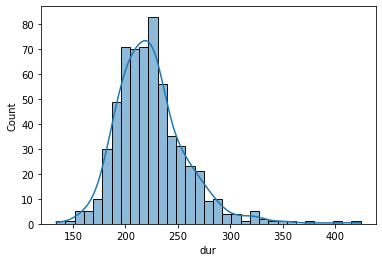

In [12]:
sns.histplot( x = 'dur', data = df, kde = True)

This is a histogram of the duration of the songs in the dataset. This gives a better idea of the usual length of songs and shows how far away any outliers are more clearly

<AxesSubplot:xlabel='year', ylabel='dur'>

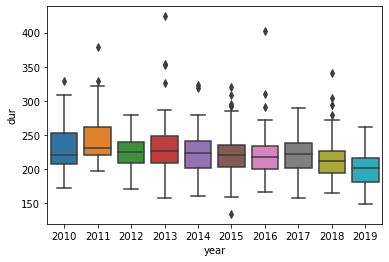

In [13]:
sns.boxplot(x = 'year', y = 'dur', data = df)

This boxplot of the data is a good indicator of the range of the duration of the songs for each year. The length of the boxplot represents the range of the interquartile range (middle 50% of the data). The larger the box, the greater the range. It can be seen here that as the years increase, the boxes are going lower, representing a general decrease in song length. The diamond shapes show outliers in each year

<AxesSubplot:xlabel='year', ylabel='dur'>

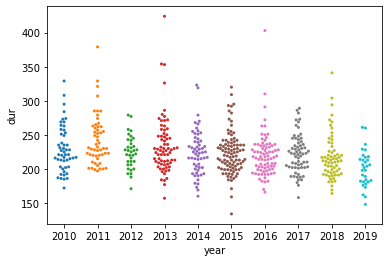

In [14]:
sns.swarmplot(x = 'year', y = 'dur', data = df, size = 3)

Similar to the barplot, the swarmplot may be easier and clearer on the eye of some viewers as it shows the actual data points for each year. The same conclusion can be made from this plot as above

df.corr()

The correlation between year, and duration of -0.21 shows evidence of a decrease in song length as the year increases

In [15]:
df2 = df.groupby(['year']).mean()

From now on, we will use the mean of each year to further analyse the data through more graphs

In [16]:
df2 = df2.reset_index()

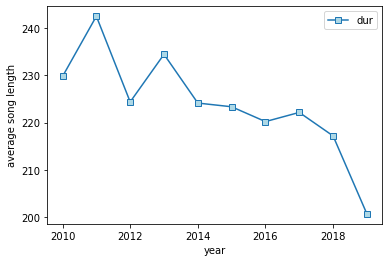

In [17]:
graph = df2.plot(x = 'year', y = 'dur', marker = 's', markerfacecolor = 'lightblue')
plt.ylabel('average song length')
plt.show()

This is a plot of the average song length for each year from 2010-2019, and displays visually the decrease in the average that we discussed before

In [18]:
# Want to put kdeplot but can't figure out best way to. Coloured plot showing the length of songs each year sort of

Predictions from now on

In [19]:
X1 = df['year']

In [20]:
y1 = df['dur']

np.polyfit(X1,y1,1)

OLS (simple linear regression to predict 2021 value)

In [21]:
year = 2021

In [22]:
predicted_duration1 = -2.81915201e+00*year + 5.90411617e+03

In [23]:
predicted_duration1

206.6099577900004

In [24]:
X2 = df2['year']

In [25]:
y2 = df2['dur']

In [26]:
np.polyfit(X2,y2,1)

array([-2.99892774e+00,  6.26524128e+03])

In [27]:
predicted_durationmean = -2.99892774e+00*year + 6.26524128e+03

In [28]:
predicted_durationmean

204.40831746000003

Machine Learning from now

In [29]:
X = df['year'].array.reshape(-1, 1)

In [30]:
y = df['dur']

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
model = LinearRegression()

In [35]:
model.fit(X_train, y_train)

LinearRegression()

In [36]:
test_predictions = model.predict(X_test)

In [37]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [38]:
MAE = mean_absolute_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)
RMSE = np.sqrt(MSE)

In [39]:
MAE

26.36454659021013

In [40]:
MSE

1360.9676284627446

In [41]:
RMSE

36.891294751780464

The error statistics here may appear high. But considering the mean song duration in the dataset of 224.67495854063017, these aren't extreme.  

In [42]:
model.predict([[2021]])

array([207.01971488])

In [43]:
df_actual = pd.read_csv('/Users/roryobrien/Documents/Coding/Python1/spotify/spotify_top50_2021.csv')

In [44]:
df_actual.head()

,id,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,1,Olivia Rodrigo,drivers license,5wANPM4fQCJwkGd4rN57mH,92,0.561,0.431,10,-8.810,1,0.0578,0.76800,0.000014,0.1060,0.137,143.875,242013,4
1,2,Lil Nas X,MONTERO (Call Me By Your Name),1SC5rEoYDGUK4NfG82494W,90,0.593,0.503,8,-6.725,0,0.2200,0.29300,0.000000,0.4050,0.710,178.781,137704,4
2,3,The Kid LAROI,STAY (with Justin Bieber),5PjdY0CKGZdEuoNab3yDmX,92,0.591,0.764,1,-5.484,1,0.0483,0.03830,0.000000,0.1030,0.478,169.928,141806,4
3,4,Olivia Rodrigo,good 4 u,4ZtFanR9U6ndgddUvNcjcG,95,0.563,0.664,9,-5.044,1,0.1540,0.33500,0.000000,0.0849,0.688,166.928,178147,4
4,5,Dua Lipa,Levitating (feat. DaBaby),5nujrmhLynf4yMoMtj8AQF,89,0.702,0.825,6,-3.787,0,0.0601,0.00883,0.000000,0.0674,0.915,102.977,203064,4


In [45]:
df_actual = df_actual[['artist_name', 'track_name', 'duration_ms']]

In [46]:
df_actual['duration_s'] = df_actual['duration_ms'] / 1000

In [47]:
df_actual.head()

,artist_name,track_name,duration_ms,duration_s
0,Olivia Rodrigo,drivers license,242013,242.013
1,Lil Nas X,MONTERO (Call Me By Your Name),137704,137.704
2,The Kid LAROI,STAY (with Justin Bieber),141806,141.806
3,Olivia Rodrigo,good 4 u,178147,178.147
4,Dua Lipa,Levitating (feat. DaBaby),203064,203.064


In [48]:
df_actual['duration_s'].mean()

197.4884

In [49]:
df_actual.nsmallest(1, 'duration_s')

,artist_name,track_name,duration_ms,duration_s
10,Masked Wolf,Astronaut In The Ocean,132780,132.78


It can be seen here that the smallest duration song in 2019 (132.78 seconds) is already smaller than the smallest duration song over the years 2010-2019 (134 seconds)